In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

from sklearn.manifold import TSNE
from matplotlib import cm

In [112]:
data_table = pd.read_csv('../dataset/final/seasonality_pattern/tshirts_scaled_sales.csv', index_col = 0)

# Normal Euclidean K-means

In [106]:
metrics = []
X = data_table.iloc[:,1:-1]
X_norm = normalize(X)
for i in range(2,20):
    km = KMeans(n_clusters = i,random_state = 0)
    km.fit(X)
    y_pred = km.labels_
    sil = silhouette_score(data_table.iloc[:,1:-1],y_pred)
    metrics.append(sil)


[0.23125628866367554, 0.2861712952678023, 0.3130454248418356, 0.32375172822470316, 0.332451917831318, 0.3243434360442315, 0.34424500772108435, 0.3467224603837898, 0.3406819853658302, 0.3434075110344647, 0.3362215489456868, 0.3334687050118874, 0.33663265460790315, 0.3419718874180304, 0.32676077573673046, 0.32304534220886166, 0.3193507203371618, 0.3310209028641514]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Text(0.5, 1.0, 'Silhouette score')

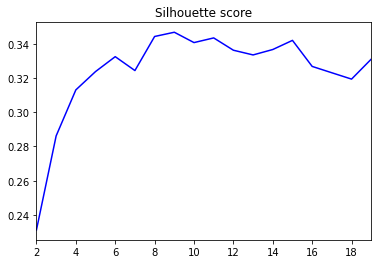

In [107]:
print(metrics)
plt_x = np.arange(2,20,1)
print(plt_x)
plt.figure()
plt.plot(plt_x,metrics,'b-')
plt.xlim(2,19)
plt.title('Silhouette score')

# TS Euclidean K-means

In [113]:
seed = 0
num_clusters = 9

metrics = []
# display(data_table)
# display(data_table.iloc[:,1:-1])
for i in range(2,13): 
    #preprocessing
    X = TimeSeriesScalerMeanVariance().fit_transform(data_table.iloc[:,1:-1])
    km = TimeSeriesKMeans(n_clusters = i, verbose = True, random_state = seed)
    y_pred = km.fit_predict(X)
    sil = silhouette_score(data_table.iloc[:,1:-1],y_pred)
    metrics.append(sil)




17.177 --> 9.233 --> 9.210 --> 9.206 --> 9.205 --> 9.204 --> 9.204 --> 9.204 --> 9.204 --> 9.203 --> 9.203 --> 9.203 --> 9.203 --> 9.203 --> 
11.424 --> 7.315 --> 7.247 --> 7.240 --> 7.237 --> 7.235 --> 7.235 --> 7.234 --> 7.234 --> 7.234 --> 7.233 --> 7.232 --> 7.232 --> 7.232 --> 7.232 --> 7.232 --> 
8.737 --> 5.600 --> 5.557 --> 5.543 --> 5.541 --> 5.541 --> 5.540 --> 5.540 --> 5.540 --> 
6.777 --> 4.638 --> 4.604 --> 4.593 --> 4.586 --> 4.569 --> 4.556 --> 4.551 --> 4.549 --> 4.546 --> 4.544 --> 4.542 --> 4.542 --> 4.542 --> 4.542 --> 4.542 --> 4.542 --> 
5.745 --> 4.014 --> 3.980 --> 3.972 --> 3.971 --> 3.970 --> 3.970 --> 3.969 --> 3.969 --> 
5.209 --> 3.510 --> 3.472 --> 3.467 --> 3.465 --> 3.465 --> 3.465 --> 3.465 --> 
4.497 --> 2.869 --> 2.818 --> 2.808 --> 2.803 --> 2.803 --> 2.802 --> 2.802 --> 2.802 --> 2.802 --> 
4.078 --> 2.717 --> 2.658 --> 2.639 --> 2.628 --> 2.623 --> 2.621 --> 2.619 --> 2.619 --> 2.619 --> 2.618 --> 2.618 --> 2.617 --> 2.617 --> 2.616 --> 2.616 --> 2

[0.22125598529396193, 0.2600397582266718, 0.31466834701406193, 0.3232718282145249, 0.32505660673549525, 0.3204748561654433, 0.3431270012043977, 0.33124995721898626, 0.32262808484114025, 0.31146939219781355, 0.30842267747533497]
[ 2  3  4  5  6  7  8  9 10 11 12]


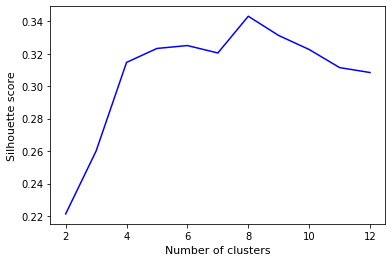

In [135]:
print(metrics)
plt_x = np.arange(2,13,1)
print(plt_x)
plt.figure()
plt.plot(plt_x,metrics,'b-')
# plt.title('Silhouette score')
plt.xlabel('Number of clusters', fontsize=11)
plt.ylabel('Silhouette score', fontsize=11)
plt.savefig('silhouette score.pdf', dpi = 600)

4.497 --> 2.869 --> 2.818 --> 2.808 --> 2.803 --> 2.803 --> 2.802 --> 2.802 --> 2.802 --> 2.802 --> 


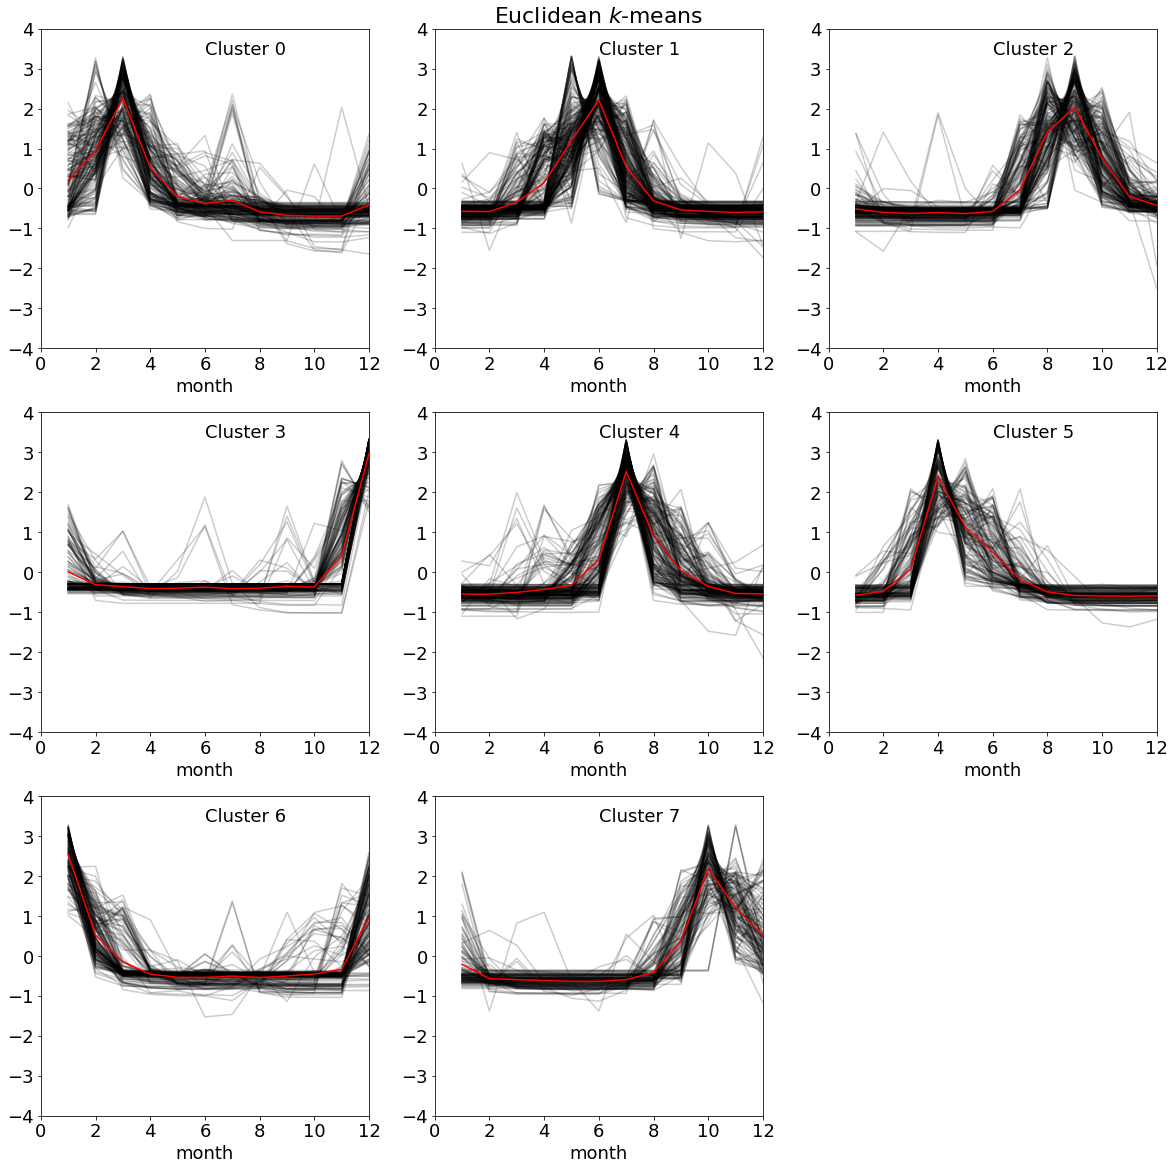

In [140]:
num_clusters = 8

X = TimeSeriesScalerMeanVariance().fit_transform(data_table.iloc[:,1:-1])
km = TimeSeriesKMeans(n_clusters = num_clusters, verbose = True, random_state = seed)
y_pred = km.fit_predict(X)

plot_x = np.arange(1,13,1)
# Printing
plt.figure(figsize = (20,20))
for yi in range(num_clusters):
    plt.subplot(3, 3, yi+1)
    for xx in X[y_pred == yi]:
        plt.plot(plot_x,xx.ravel(), "k-", alpha=.2)
    plt.plot(plot_x,km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)

    plt.xlabel('month',fontsize = 18)
#     plt.ylabel('potential',fontsize = 18)

    plt.text(0.5, 0.92,'Cluster %d' % (yi),
             transform=plt.gca().transAxes,fontsize = 18)
    if yi == 1:
        plt.title("Euclidean $k$-means",fontsize = 22)
plt.savefig('../../saved_figs/patterns of each cluster.pdf',dpi = 1200,bbox_inches = 'tight')

[[-0.37153901]
 [-0.37153901]
 [-0.37153901]
 [-0.37153901]
 [-0.37153901]
 [-0.37153901]
 [-0.37153901]
 [-0.37153901]
 [-0.37153901]
 [-0.37153901]
 [ 3.22105962]
 [ 0.49433043]]


,0,1
0,30.802214,-2.149942
1,18.132362,-16.101974
2,17.994715,-16.373486
3,26.009558,-10.644766
4,27.755026,3.838205
...,...,...
1357,10.636576,27.793493
1358,10.465536,29.150276
1359,10.940944,29.059246
1360,10.587772,25.523941


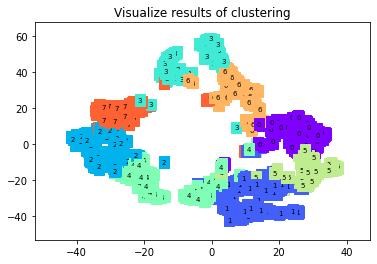

In [117]:
## visualize the result of clustering using TSNE
tsne = TSNE()
tsne.fit_transform(data_table.iloc[:,1:-1].values)
tsne_results = pd.DataFrame(tsne.embedding_,index= data_table.index)
labels = y_pred
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    # 降到二维了，分别给x和y
    X, Y = lowDWeights.iloc[:, 0], lowDWeights.iloc[:, 1]
    # 遍历每个点以及对应标签
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255/8 * s)) # 为了使得颜色有区分度，把0-255颜色区间分为9分,然后把标签映射到一个区间
        plt.text(x, y, s, backgroundcolor=c, fontsize=7)
    plt.xlim(X.min()-10, X.max()+10)
    plt.ylim(Y.min()-10, Y.max()+10); plt.title('Visualize results of clustering')
    plt.savefig("../../saved_fig/clustering_results.pdf", dpi = 600)
    plt.show()

display(tsne_results)
plot_with_labels(tsne_results,labels)

In [82]:
final_data_table = data_table.copy(deep = True)
final_data_table['cluster_num'] = y_pred
display(final_data_table)

col = [i for i in range(1,13)]
mid_data_table = final_data_table.drop(['max'],axis = 1)

cluster_data = mid_data_table.iloc[:,1:].groupby('cluster_num').mean()
display(cluster_data)

,product_id,1,2,3,4,5,6,7,8,9,10,11,12,max,cluster_num
0,2134,0.000000,0.179952,1.000000,0.707277,0.051630,0.020531,0.012379,0.000453,0.000000,0.000000,0.000000,0.000000,6624.0,0
1,2135,0.000000,0.115304,0.689741,0.705971,1.000000,0.770434,0.140334,0.006974,0.000391,0.000521,0.000000,0.000000,15342.0,5
2,2136,0.000000,0.120796,0.661738,0.757371,1.000000,0.870385,0.164029,0.004496,0.001038,0.000000,0.000000,0.000000,11565.0,5
3,2137,0.028822,0.162094,0.516947,1.000000,0.793636,0.385059,0.187457,0.000922,0.000692,0.000231,0.000000,0.000000,4337.0,5
4,2138,0.044324,0.411578,1.000000,0.416101,0.069652,0.210312,0.372230,0.004523,0.001809,0.000000,0.000000,0.000000,2211.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,5367,1.000000,0.221612,0.014652,0.021978,0.001832,0.001832,0.007326,0.010989,0.003663,0.001832,0.000000,0.239927,546.0,6
1358,5369,1.000000,0.182069,0.010115,0.005172,0.002529,0.033908,0.005747,0.001954,0.011724,0.000115,0.000230,0.284023,8700.0,6
1359,5370,1.000000,0.163636,0.013312,0.008766,0.005087,0.029004,0.007684,0.004437,0.000000,0.005195,0.000108,0.265693,9240.0,6
1360,5371,1.000000,0.307875,0.011435,0.005394,0.006041,0.154693,0.011866,0.005178,0.014887,0.017476,0.000000,0.151888,4635.0,6


,1,2,3,4,5,6,7,8,9,10,11,12
cluster_num,,,,,,,,,,,,
0,0.314589,0.548866,0.937160,0.400070,0.169124,0.110840,0.133592,0.041243,0.013485,0.009029,0.009509,0.103423
1,0.018868,0.016956,0.095736,0.265789,0.596508,0.910771,0.394263,0.109640,0.031462,0.018207,0.010364,0.015896
2,0.047365,0.019026,0.010388,0.018867,0.010085,0.028022,0.217978,0.687667,0.869654,0.473061,0.151874,0.082153
3,0.132108,0.034280,0.019305,0.005284,0.007927,0.016034,0.005125,0.006831,0.022283,0.017597,0.261060,0.989212
4,0.022213,0.020063,0.034789,0.059858,0.094568,0.297730,0.973599,0.495846,0.218191,0.086252,0.028809,0.024756
5,0.009377,0.042116,0.229168,0.944781,0.579033,0.379053,0.142050,0.038362,0.007506,0.002519,0.001430,0.003407
6,0.976650,0.357867,0.152349,0.047933,0.020844,0.019533,0.034013,0.018350,0.028462,0.043999,0.085052,0.514155
7,0.149320,0.029031,0.018442,0.011421,0.005719,0.005228,0.018089,0.077897,0.344551,0.917756,0.627040,0.400592


In [103]:
mid_data_table.to_csv('seasonality_patterns.csv',index = False)

# DTW K-means

In [61]:
seed = 0
num_clusters = 9

metrics = []
# display(data_table)
# display(data_table.iloc[:,1:-1])
for i in range(2,13):  
    X = TimeSeriesScalerMeanVariance().fit_transform(data_table.iloc[:,1:-1])
    dba_km = TimeSeriesKMeans(n_clusters=i,
                              n_init=2,
                              metric="dtw",
                              verbose=True,
                              max_iter_barycenter=10,
                              random_state=seed)
    y_pred = dba_km.fit_predict(X)
    sil = silhouette_score(data_table.iloc[:,1:-1],y_pred)
    metrics.append(sil)

Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


5.397 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


3.839 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.854 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.703 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.701 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.701 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.701 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.701 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


7.254 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.707 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.697 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.697 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.696 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.696 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.696 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


2.696 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2724 out of 2724 | elapsed:    0.2s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.993 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.4s finished


2.174 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.144 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.131 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.129 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.128 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.128 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.4s finished


2.128 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.128 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


3.142 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.041 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.029 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.027 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.026 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.026 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


2.026 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished


2.559 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished


1.913 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.839 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.816 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished


1.805 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.798 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.793 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.791 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.791 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.791 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.791 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.791 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


2.545 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.915 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.867 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.821 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.794 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.779 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.772 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.766 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.763 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished


1.762 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.761 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.761 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.761 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished


1.761 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.760 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.760 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.760 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.760 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished


1.760 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


1.760 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


2.116 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.733 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.6s finished


1.687 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.668 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.660 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.6s finished


1.655 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.6s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.6s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished



Init 2
2.144 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.6s finished


1.546 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.505 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.498 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.497 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.6s finished


1.496 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.496 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.495 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.489 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.485 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.484 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.484 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.6s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.6s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


1.483 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6810 out of 6810 | elapsed:    0.5s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.850 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.473 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.469 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.468 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.468 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.7s finished


1.467 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.467 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.467 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[


Init 2
2.053 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.532 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.489 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.462 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.406 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.394 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.382 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.7s finished


1.375 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.373 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.373 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.373 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.7s finished


1.372 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.370 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.370 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.370 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.370 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.370 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


1.370 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8172 out of 8172 | elapsed:    0.6s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.637 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.351 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.328 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.321 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.319 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.319 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.319 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.319 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.319 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.319 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4086 out of 4086 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[


Init 2
2.047 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.494 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.423 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.384 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.366 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.357 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.351 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.348 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.345 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.344 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.344 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.344 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.344 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.342 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.342 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.342 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.342 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.8s finished


1.342 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


1.342 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9534 out of 9534 | elapsed:    0.7s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.624 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.237 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.202 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.187 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.178 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.172 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.167 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.162 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.159 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.158 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.157 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.156 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.156 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.156 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.156 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.156 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[


Init 2
1.597 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.283 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.259 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.247 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.231 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.213 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.203 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.193 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.186 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.178 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.172 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.169 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.168 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.167 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.166 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.166 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.165 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.165 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.165 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.8s finished


1.165 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


1.165 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10896 out of 10896 | elapsed:    0.9s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.560 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.181 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.132 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.106 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.094 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.087 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.082 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.077 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.073 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.071 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.070 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.069 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.069 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.068 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.068 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.068 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.759 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.213 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.162 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.130 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.128 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.126 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.124 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.122 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.122 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.121 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.120 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.119 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.116 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.115 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.113 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


1.110 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.110 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.109 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.109 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    0.9s finished


1.109 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12258 out of 12258 | elapsed:    1.0s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.381 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.092 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.062 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.049 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.039 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.036 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.034 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.033 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.032 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.031 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.030 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.029 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.029 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.028 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.028 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.028 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.028 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.328 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.093 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.060 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.043 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.036 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.032 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.029 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.026 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.025 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.024 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.024 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.023 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.023 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.023 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.021 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.020 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.020 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


1.020 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.1s finished


1.020 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13620 out of 13620 | elapsed:    1.0s finished


Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.294 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


1.026 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


1.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.998 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.993 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.4s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.3s finished


0.991 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.989 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.989 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.988 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.988 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.987 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.3s finished


0.987 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.4s finished


0.987 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.986 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.3s finished


0.986 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.986 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.985 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.985 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.985 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.984 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.984 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.984 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.984 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.984 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.983 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.983 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.982 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.982 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.981 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.979 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.978 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.977 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.976 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[


Init 2
1.355 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.0s finished


1.064 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


1.034 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


1.025 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


1.020 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


1.006 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.999 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.996 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.994 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.993 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.993 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.991 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.991 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.991 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.0s finished


0.991 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.2s finished


0.991 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.990 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.990 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.990 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.990 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.990 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished


0.990 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14982 out of 14982 | elapsed:    1.1s finished



Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

1.240 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


1.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.984 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.981 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.978 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.973 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.972 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.971 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.970 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.970 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.969 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.969 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.969 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.968 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.968 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.968 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.967 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.967 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.967 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.967 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.967 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.966 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.966 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.966 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.965 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.964 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.964 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.963 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.961 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.960 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.959 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.958 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.957 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.957 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.957 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.957 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.957 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1362 out of 1362 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5448 out of 5448 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[


Init 2
1.284 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.991 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.938 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.928 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.925 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.924 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.922 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.922 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.922 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.921 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.921 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.2s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.920 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.919 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.919 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


0.919 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16344 out of 16344 | elapsed:    1.3s finished


[0.2129864987473785, 0.19334048995132727, 0.12710576954376301, 0.11661243657006816, 0.11200564503759936, 0.09374872035220412, 0.08918723713043988, 0.08152765701151274, 0.09632575676248956, 0.07102869365747927, 0.06406671346741623]
[ 2  3  4  5  6  7  8  9 10 11 12]


Text(0.5, 1.0, 'Silhouette score')

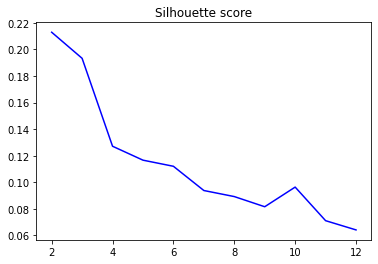

In [62]:
print(metrics)
plt_x = np.arange(2,13,1)
print(plt_x)
plt.figure()
plt.plot(plt_x,metrics,'b-')
plt.title('Silhouette score')

# Soft DTW-K means

In [32]:
metrics = []
for i in range(2,13):

    sdtw_km = TimeSeriesKMeans(n_clusters=i,
                               metric="softdtw",
                               metric_params={"gamma": .01},
                               verbose=True,
                               random_state=seed)

    y_pred = sdtw_km.fit_predict(X)

    sil = silhouette_score(data_table.iloc[:,1:-1],y_pred)
    metrics.append(sil)


    

65.413 --> 30.011 --> 12.108 --> 10.678 --> 10.674 --> 10.684 --> 10.674 --> 10.666 --> 10.662 --> 10.658 --> 10.656 --> 10.656 --> 10.655 --> 10.655 --> 10.655 --> 10.656 --> 10.655 --> 10.656 --> 10.656 --> 10.657 --> 10.656 --> 10.657 --> 10.656 --> 10.657 --> 10.656 --> 10.656 --> 10.656 --> 10.656 --> 10.656 --> 10.656 --> 10.656 --> 
16.367 --> 6.613 --> 6.499 --> 6.517 --> 6.507 --> 6.526 --> 6.537 --> 6.535 --> 6.535 --> 6.536 --> 6.535 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 6.536 --> 
13.306 --> 4.942 --> 4.782 --> 4.791 --> 4.784 --> 4.802 --> 4.800 --> 4.799 --> 4.793 --> 4.794 --> 4.787 --> 4.789 --> 4.787 --> 4.788 --> 4.786 --> 4.787 --> 4.786 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 4.787 --> 
6.612 --> 3.912 --> 3.762 --> 3.694 --> 3.671 --> 3.66

[-0.05011499053641472, -0.1512369528242247, -0.15038799611453654, -0.19619720598451842, -0.20836244005820037, -0.23939139426528555, -0.24777979174925177, -0.28872196159855645, -0.3300358713727096, -0.3345798645073509, -0.35422338474291026]
[ 0  1  2  3  4  5  6  7  8  9 10]


Text(0.5, 1.0, 'Silhouette score')

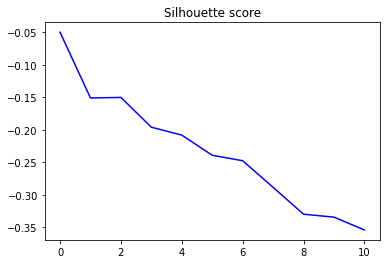

In [38]:
print(metrics)
plt_x = np.arange(0,11,1)
print(plt_x)
plt.figure()
plt.plot(plt_x,metrics,'b-')
plt.title('Silhouette score')

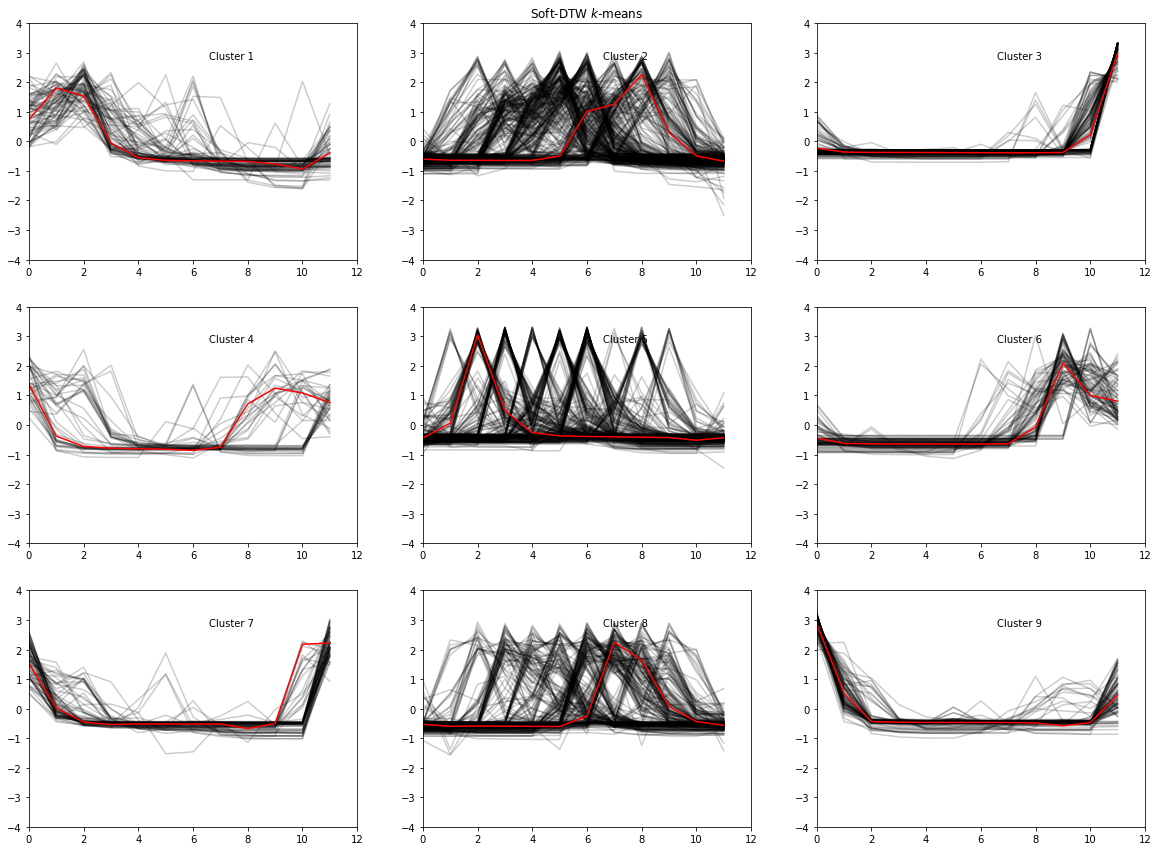

In [29]:
plt.figure(figsize = (20,20))
for yi in range(num_clusters):
    plt.subplot(4, 3, 1 + yi)
    for xx in X[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")